In [1]:
import os
import pandas as pd

In [2]:
os.listdir("../data/apt")[0]

'아파트(매매)__실거래가_20220423023515.csv'

In [6]:
df = pd.read_csv("../data/apt/" + os.listdir("../data/apt")[0], encoding='euc-kr', skiprows=15)
df

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,강원도 강릉시 견소동,202,0202,0,송정한신,116.175,202101,14,"22,300",3,1997,경강로2539번길 8,NaN,-,-
1,강원도 강릉시 견소동,202,0202,0,송정한신,59.800,202101,15,"15,700",11,1997,경강로2539번길 8,NaN,-,-
2,강원도 강릉시 견소동,202,0202,0,송정한신,84.945,202101,19,"17,700",15,1997,경강로2539번길 8,NaN,-,-
3,강원도 강릉시 견소동,202,0202,0,송정한신,84.945,202101,19,"17,400",11,1997,경강로2539번길 8,NaN,-,-
4,강원도 강릉시 견소동,202,0202,0,송정한신,84.945,202101,19,"18,250",12,1997,경강로2539번길 8,NaN,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62599,충청북도 충주시 호암동,1191,1191,0,호암힐데스하임,84.950,202101,6,"37,400",4,2019,호암토성2로 1,NaN,-,-
62600,충청북도 충주시 호암동,1191,1191,0,호암힐데스하임,84.940,202101,16,"42,000",19,2019,호암토성2로 1,NaN,-,-
62601,충청북도 충주시 호암동,1191,1191,0,호암힐데스하임,84.960,202101,18,"37,400",2,2019,호암토성2로 1,NaN,-,-
62602,충청북도 충주시 호암동,1191,1191,0,호암힐데스하임,84.960,202101,23,"38,400",12,2019,호암토성2로 1,NaN,-,-


## 과제1
### 2021년 각 지역별 가장 비싼 아파트?

In [12]:
df[['시군구', '거래금액(만원)']]

,시군구,거래금액(만원)
0,강원도 강릉시 견소동,"22,300"
1,강원도 강릉시 견소동,"15,700"
2,강원도 강릉시 견소동,"17,700"
3,강원도 강릉시 견소동,"17,400"
4,강원도 강릉시 견소동,"18,250"
...,...,...
62599,충청북도 충주시 호암동,"37,400"
62600,충청북도 충주시 호암동,"42,000"
62601,충청북도 충주시 호암동,"37,400"
62602,충청북도 충주시 호암동,"38,400"


In [13]:
df[['시군구', '거래금액(만원)']].groupby('시군구').max()

,거래금액(만원)
시군구,
강원도 강릉시 견소동,"28,250"
강원도 강릉시 교동,"9,400"
강원도 강릉시 남문동,"24,500"
강원도 강릉시 내곡동,"9,900"
강원도 강릉시 노암동,"8,230"
...,...
충청북도 충주시 주덕읍 신중리,"3,200"
충청북도 충주시 중앙탑면 용전리,"34,800"
충청북도 충주시 지현동,"11,200"


In [14]:
df['시군구'].unique().size

2770

In [18]:
df[['시군구', '거래금액(만원)']].groupby('시군구').max().sort_values(by=['거래금액(만원)'], ascending=False)

,거래금액(만원)
시군구,
서울특별시 구로구 신도림동,"99,900"
서울특별시 관악구 봉천동,"99,900"
경기도 화성시 청계동,"99,900"
서울특별시 영등포구 영등포동,"99,800"
서울특별시 중랑구 묵동,"99,800"
...,...
인천광역시 중구 북성동1가,"10,000"
전라북도 정읍시 신태인읍 연정리,"10,000"
경상북도 포항남구 대송면 제내리,"1,900"


10억까지밖에 안찍히네 ?

## 과제2
### 강남구 월별 평균 매매가격 추이 (그래프)

In [66]:
df_강남 = df[df['시군구'].apply(lambda x : x[6:9]) == '강남구']

In [67]:
df_강남

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
39687,서울특별시 강남구 개포동,1282,1282,0,개포래미안포레스트,74.6600,202101,17,"245,000",7,2020,개포로 264,NaN,-,-
39688,서울특별시 강남구 개포동,652,0652,0,개포우성3차,104.4300,202101,5,"220,000",3,1984,개포로 307,NaN,-,-
39689,서울특별시 강남구 개포동,652,0652,0,개포우성3차,104.4300,202101,5,"220,000",3,1984,개포로 307,20210201.0,-,-
39690,서울특별시 강남구 개포동,652,0652,0,개포우성3차,104.4300,202101,11,"220,000",8,1984,개포로 307,NaN,-,-
39691,서울특별시 강남구 개포동,652,0652,0,개포우성3차,104.4300,202101,25,"145,000",6,1984,개포로 307,NaN,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40002,서울특별시 강남구 청담동,34-13,0034,13,청담스위트,13.4250,202101,5,"23,000",3,2015,학동로73길 13,NaN,-,-
40003,서울특별시 강남구 청담동,34-13,0034,13,청담스위트,13.4250,202101,27,"23,100",4,2015,학동로73길 13,NaN,-,-
40004,서울특별시 강남구 청담동,122-35,0122,35,청담신원아침도시마인,27.7131,202101,16,"33,500",5,2013,도산대로85길 30,NaN,-,-
40005,서울특별시 강남구 청담동,130,0130,0,청담아이파크,110.1800,202101,6,"235,000",14,1992,영동대로142길 25,NaN,-,-


In [70]:
df_강남[['시군구', '계약년월', '거래금액(만원)']]

,시군구,계약년월,거래금액(만원)
39687,서울특별시 강남구 개포동,202101,"245,000"
39688,서울특별시 강남구 개포동,202101,"220,000"
39689,서울특별시 강남구 개포동,202101,"220,000"
39690,서울특별시 강남구 개포동,202101,"220,000"
39691,서울특별시 강남구 개포동,202101,"145,000"
...,...,...,...
40002,서울특별시 강남구 청담동,202101,"23,000"
40003,서울특별시 강남구 청담동,202101,"23,100"
40004,서울특별시 강남구 청담동,202101,"33,500"
40005,서울특별시 강남구 청담동,202101,"235,000"


In [72]:
df_강남['계약년월'].unique()

array([202101], dtype=int64)

### 아 1월밖에 없네

In [90]:
total_1_12 = []
for x in range(12):
    df1 = pd.read_csv("../data/apt/" + os.listdir("../data/apt")[x], encoding='euc-kr', skiprows=15)
    total_1_12.append(df1)

In [91]:
total_1_12

[                시군구    번지    본번  부번      단지명  전용면적(㎡)    계약년월  계약일 거래금액(만원)  \
 0       강원도 강릉시 견소동   202  0202   0     송정한신  116.175  202101   14   22,300   
 1       강원도 강릉시 견소동   202  0202   0     송정한신   59.800  202101   15   15,700   
 2       강원도 강릉시 견소동   202  0202   0     송정한신   84.945  202101   19   17,700   
 3       강원도 강릉시 견소동   202  0202   0     송정한신   84.945  202101   19   17,400   
 4       강원도 강릉시 견소동   202  0202   0     송정한신   84.945  202101   19   18,250   
 ...             ...   ...   ...  ..      ...      ...     ...  ...      ...   
 62599  충청북도 충주시 호암동  1191  1191   0  호암힐데스하임   84.950  202101    6   37,400   
 62600  충청북도 충주시 호암동  1191  1191   0  호암힐데스하임   84.940  202101   16   42,000   
 62601  충청북도 충주시 호암동  1191  1191   0  호암힐데스하임   84.960  202101   18   37,400   
 62602  충청북도 충주시 호암동  1191  1191   0  호암힐데스하임   84.960  202101   23   38,400   
 62603  충청북도 충주시 호암동  1191  1191   0  호암힐데스하임   84.940  202101   28   42,900   
 
         층  건축년도          도로명     해제사유

In [92]:
df112 = pd.concat(total_1_12)

In [255]:
df112

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,강원도 강릉시 견소동,202,0202,0.0,송정한신,116.1750,202101,14,"22,300",3,1997.0,경강로2539번길 8,NaN,-,-
1,강원도 강릉시 견소동,202,0202,0.0,송정한신,59.8000,202101,15,"15,700",11,1997.0,경강로2539번길 8,NaN,-,-
2,강원도 강릉시 견소동,202,0202,0.0,송정한신,84.9450,202101,19,"17,700",15,1997.0,경강로2539번길 8,NaN,-,-
3,강원도 강릉시 견소동,202,0202,0.0,송정한신,84.9450,202101,19,"17,400",11,1997.0,경강로2539번길 8,NaN,-,-
4,강원도 강릉시 견소동,202,0202,0.0,송정한신,84.9450,202101,19,"18,250",12,1997.0,경강로2539번길 8,NaN,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25356,충청북도 충주시 호암동,558-16,0558,16.0,한양,59.8400,202112,7,"8,000",3,1994.0,예성로 9,NaN,중개거래,충북 충주시
25357,충청북도 충주시 호암동,905,0905,0.0,호암동수채,84.9289,202112,8,"26,800",13,2007.0,호암중앙1로 47,NaN,중개거래,충북 충주시
25358,충청북도 충주시 호암동,221-23,0221,23.0,호암리버빌(1단지),84.6800,202112,3,"21,700",15,2002.0,원호암5길 32,NaN,중개거래,충북 충주시
25359,충청북도 충주시 호암동,221-23,0221,23.0,호암리버빌(1단지),84.6800,202112,6,"20,700",12,2002.0,원호암5길 32,NaN,중개거래,충북 충주시


In [93]:
df112['계약년월'].unique()

array([202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108,
       202109, 202110, 202111, 202112], dtype=int64)

In [244]:
df112[['시군구', '단지명', '거래금액(만원)']].groupby('시군구').max().sort_values(by=['거래금액(만원)'], ascending=False)

,단지명,거래금액(만원)
시군구,,
전라남도 고흥군 도화면 당오리,뉴코아,990
경기도 수원영통구 신동,래미안영통마크원2단지,"99,950"
서울특별시 강서구 염창동,현대아이파크,"99,900"
서울특별시 강북구 미아동,현대성우,"99,900"
서울특별시 노원구 월계동,현대,"99,900"
...,...,...
전라북도 군산시 성산면 둔덕리,성산그린빌,"1,650"
경상북도 칠곡군 약목면 동안리,안국,"1,650"
전라북도 김제시 흥사동,서흥,"1,600"


### 과제 1번 답

In [245]:
df112[['시군구', '단지명', '거래금액(만원)']].groupby('시군구').max().sort_values(by=['거래금액(만원)'], ascending=False)[1:]

,단지명,거래금액(만원)
시군구,,
경기도 수원영통구 신동,래미안영통마크원2단지,"99,950"
서울특별시 강서구 염창동,현대아이파크,"99,900"
서울특별시 강북구 미아동,현대성우,"99,900"
서울특별시 노원구 월계동,현대,"99,900"
충청남도 천안서북구 불당동,호반리젠시빌스위트,"99,900"
...,...,...
전라북도 군산시 성산면 둔덕리,성산그린빌,"1,650"
경상북도 칠곡군 약목면 동안리,안국,"1,650"
전라북도 김제시 흥사동,서흥,"1,600"


In [103]:
df112_gangnam = df112[df112['시군구'].apply(lambda x : x[6:9]) == '강남구']
# 서울특별시 강남구 ~~~

In [104]:
df112_gangnam

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
39687,서울특별시 강남구 개포동,1282,1282,0.0,개포래미안포레스트,74.6600,202101,17,"245,000",7,2020.0,개포로 264,NaN,-,-
39688,서울특별시 강남구 개포동,652,0652,0.0,개포우성3차,104.4300,202101,5,"220,000",3,1984.0,개포로 307,NaN,-,-
39689,서울특별시 강남구 개포동,652,0652,0.0,개포우성3차,104.4300,202101,5,"220,000",3,1984.0,개포로 307,20210201.0,-,-
39690,서울특별시 강남구 개포동,652,0652,0.0,개포우성3차,104.4300,202101,11,"220,000",8,1984.0,개포로 307,NaN,-,-
39691,서울특별시 강남구 개포동,652,0652,0.0,개포우성3차,104.4300,202101,25,"145,000",6,1984.0,개포로 307,NaN,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606,서울특별시 강남구 청담동,134,0134,0.0,래미안청담로이뷰,110.2000,202112,23,"380,000",14,1992.0,영동대로142길 16,NaN,중개거래,서울 강남구
15607,서울특별시 강남구 청담동,10,0010,0.0,삼환아파트101동,114.9700,202112,8,"198,000",4,1999.0,학동로77길 49,NaN,중개거래,서울 강남구
15608,서울특별시 강남구 청담동,122-35,0122,35.0,청담신원아침도시마인,27.7131,202112,18,"32,000",5,2013.0,도산대로85길 30,NaN,중개거래,서울 강남구
15609,서울특별시 강남구 청담동,134-38,0134,38.0,청담자이,89.3560,202112,27,"362,500",34,2011.0,영동대로138길 12,NaN,중개거래,서울 강남구


In [106]:
df112_gangnam_x = df112_gangnam[['시군구', '계약년월', '거래금액(만원)']]

In [110]:
df112_gangnam_x.head(2)

,시군구,계약년월,거래금액(만원)
39687,서울특별시 강남구 개포동,202101,"245,000"
39688,서울특별시 강남구 개포동,202101,"220,000"


In [139]:
df112_gangnam_xx = df112_gangnam_x[['계약년월', '거래금액(만원)']]
df112_gangnam_xx

,계약년월,거래금액(만원)
39687,202101,"245,000"
39688,202101,"220,000"
39689,202101,"220,000"
39690,202101,"220,000"
39691,202101,"145,000"
...,...,...
15606,202112,"380,000"
15607,202112,"198,000"
15608,202112,"32,000"
15609,202112,"362,500"


In [128]:
df112_gangnam_xx.groupby('계약년월').mean()
# 왜 에러??

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


""
계약년월
202101
202102
202103
202104
202105
202106
202107
202108
202109


In [138]:
df.groupby('계약년월').mean()
# 거래금액이 왜 드랍됨??

,부번,전용면적(㎡),계약일,층,건축년도,해제사유발생일
계약년월,,,,,,
202101,4.308654,73.03773,17.239282,9.057999,2002.407322,2.021050e+07


In [115]:
df112_gangnam_xx.groupby('계약년월').min()

,거래금액(만원)
계약년월,
202101,"100,700"
202102,"100,000"
202103,"1,150,000"
202104,"101,000"
202105,"100,000"
202106,"100,000"
202107,"1,000,000"
202108,"102,000"
202109,"103,000"


In [129]:
df112_gangnam_xx.groupby('계약년월').describe()

거래금액(만원)                     
          count unique      top freq
계약년월                                
202101      320    199  200,000    7
202102      219    165  190,000    5
202103      174    137  300,000    5
202104      238    176  325,000    5
202105      255    174   18,000   11
202106      169    132  210,000    5
202107      211    148  135,000    5
202108      199    146  200,000    5
202109      147    119  210,000    5
202110      129    105  230,000    4
202111      112     88  280,000    4
202112       70     63  150,000    3

In [176]:
df_ggc = df112_gangnam_xx.groupby('계약년월').count()
df_ggc

,거래금액(만원)
계약년월,
202101,320
202102,219
202103,174
202104,238
202105,255
202106,169
202107,211
202108,199
202109,147


In [188]:
df_ggs = df112_gangnam_xx.groupby('계약년월').sum()

In [192]:
df_ggsc = pd.merge(left = df_ggs, right= df_ggc, how = "left", on = '계약년월')
df_ggsc.head()

,거래금액(만원)_x,거래금액(만원)_y
계약년월,,
202101,"245,000220,000220,000220,000145,000239,500200,...",320
202102,"145,000200,000240,500327,000332,000173,000251,...",219
202103,"226,000235,000300,000230,00071,400215,000258,0...",174
202104,"174,000323,000225,000270,000206,000325,000303,...",238
202105,"195,000180,000198,500205,000289,000260,000239,...",255


In [193]:
df_ggsc.columns

Index(['거래금액(만원)_x', '거래금액(만원)_y'], dtype='object')

In [197]:
df_ggsc1 = df_ggsc.reset_index()
df_ggsc1.head()

,계약년월,거래금액(만원)_x,거래금액(만원)_y
0,202101,"245,000220,000220,000220,000145,000239,500200,...",320
1,202102,"145,000200,000240,500327,000332,000173,000251,...",219
2,202103,"226,000235,000300,000230,00071,400215,000258,0...",174
3,202104,"174,000323,000225,000270,000206,000325,000303,...",238
4,202105,"195,000180,000198,500205,000289,000260,000239,...",255


In [199]:
df_ggsc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   계약년월        12 non-null     int64 
 1   거래금액(만원)_x  12 non-null     object
 2   거래금액(만원)_y  12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 416.0+ bytes


In [202]:
df_ggsc1.astype({'거래금액(만원)_y' : 'object'})

,계약년월,거래금액(만원)_x,거래금액(만원)_y
0,202101,"245,000220,000220,000220,000145,000239,500200,...",320
1,202102,"145,000200,000240,500327,000332,000173,000251,...",219
2,202103,"226,000235,000300,000230,00071,400215,000258,0...",174
3,202104,"174,000323,000225,000270,000206,000325,000303,...",238
4,202105,"195,000180,000198,500205,000289,000260,000239,...",255
5,202106,"210,000210,000185,000365,000200,000273,000225,...",169
6,202107,"245,000249,500285,000287,000328,00061,000342,0...",211
7,202108,"200,000250,000199,500285,000275,000254,000280,...",199
8,202109,"220,000310,000278,000253,000210,000297,000272,...",147
9,202110,"224,900185,000220,000279,500285,000340,000230,...",129


In [203]:
df_ggsc1['거래금액(만원) 평균'] = df_ggsc1['거래금액(만원)_x'] / df_ggsc1['거래금액(만원)_y']

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [207]:
# 그러고보니까 몇억들 더해서 저런숫자가 나올리가 없는데? 이상하다

In [206]:
df112_gangnam_xx.info()
# 여기서부터 object였네
# sum이 이상하게 된듯

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2243 entries, 39687 to 15610
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   계약년월      2243 non-null   int64 
 1   거래금액(만원)  2243 non-null   object
dtypes: int64(1), object(1)
memory usage: 117.1+ KB


In [243]:
df112_gangnam_xx[['거래금액(만원)']]

,거래금액(만원)
39687,"245,000"
39688,"220,000"
39689,"220,000"
39690,"220,000"
39691,"145,000"
...,...
15606,"380,000"
15607,"198,000"
15608,"32,000"
15609,"362,500"


In [236]:
str(df112_gangnam_xx['거래금액(만원)']).replace(',', '')

'39687    245000\n39688    220000\n39689    220000\n39690    220000\n39691    145000\n          ...   \n15606    380000\n15607    198000\n15608     32000\n15609    362500\n15610    320000\nName: 거래금액(만원) Length: 2243 dtype: object'

In [237]:
pd.concat(str(df112_gangnam_xx['거래금액(만원)']).replace(',', ''))

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "str"

In [235]:
df112_gangnam_xx

,계약년월,거래금액(만원),거래금액(만원)1
39687,202101,"245,000",39687 245000\n39688 220000\n39689 220...
39688,202101,"220,000",39687 245000\n39688 220000\n39689 220...
39689,202101,"220,000",39687 245000\n39688 220000\n39689 220...
39690,202101,"220,000",39687 245000\n39688 220000\n39689 220...
39691,202101,"145,000",39687 245000\n39688 220000\n39689 220...
...,...,...,...
15606,202112,"380,000",39687 245000\n39688 220000\n39689 220...
15607,202112,"198,000",39687 245000\n39688 220000\n39689 220...
15608,202112,"32,000",39687 245000\n39688 220000\n39689 220...
15609,202112,"362,500",39687 245000\n39688 220000\n39689 220...


# 다시

In [248]:
df112_gangnam_xx['거래금액(만원)']

39687    245,000
39688    220,000
39689    220,000
39690    220,000
39691    145,000
          ...   
15606    380,000
15607    198,000
15608     32,000
15609    362,500
15610    320,000
Name: 거래금액(만원), Length: 2243, dtype: object

In [251]:
total2_1_12 = []
for x in range(12):
    df2 = pd.read_csv("../data/apt/" + os.listdir("../data/apt")[x], encoding='euc-kr', skiprows=15, thousands=',')
    total2_1_12.append(df2)

In [249]:
df112_gangnam_xx['거래금액(만원)'] = pd.to_numeric(df112_gangnam_xx['거래금액(만원)'])


ValueError: Unable to parse string "245,000" at position 0

In [256]:
df3 = pd.concat(total2_1_12)

In [258]:
df112_gangnam = df3[df3['시군구'].apply(lambda x : x[6:9]) == '강남구']
df112_gangnam

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
39687,서울특별시 강남구 개포동,1282,1282,0.0,개포래미안포레스트,74.6600,202101,17,245000,7,2020.0,개포로 264,NaN,-,-
39688,서울특별시 강남구 개포동,652,0652,0.0,개포우성3차,104.4300,202101,5,220000,3,1984.0,개포로 307,NaN,-,-
39689,서울특별시 강남구 개포동,652,0652,0.0,개포우성3차,104.4300,202101,5,220000,3,1984.0,개포로 307,20210201.0,-,-
39690,서울특별시 강남구 개포동,652,0652,0.0,개포우성3차,104.4300,202101,11,220000,8,1984.0,개포로 307,NaN,-,-
39691,서울특별시 강남구 개포동,652,0652,0.0,개포우성3차,104.4300,202101,25,145000,6,1984.0,개포로 307,NaN,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606,서울특별시 강남구 청담동,134,0134,0.0,래미안청담로이뷰,110.2000,202112,23,380000,14,1992.0,영동대로142길 16,NaN,중개거래,서울 강남구
15607,서울특별시 강남구 청담동,10,0010,0.0,삼환아파트101동,114.9700,202112,8,198000,4,1999.0,학동로77길 49,NaN,중개거래,서울 강남구
15608,서울특별시 강남구 청담동,122-35,0122,35.0,청담신원아침도시마인,27.7131,202112,18,32000,5,2013.0,도산대로85길 30,NaN,중개거래,서울 강남구
15609,서울특별시 강남구 청담동,134-38,0134,38.0,청담자이,89.3560,202112,27,362500,34,2011.0,영동대로138길 12,NaN,중개거래,서울 강남구


In [259]:
df112_gangnam[['계약년월', '거래금액(만원)']]

,계약년월,거래금액(만원)
39687,202101,245000
39688,202101,220000
39689,202101,220000
39690,202101,220000
39691,202101,145000
...,...,...
15606,202112,380000
15607,202112,198000
15608,202112,32000
15609,202112,362500


In [265]:
df_ggm = df112_gangnam[['계약년월', '거래금액(만원)']].groupby('계약년월').mean()
df_ggm

,거래금액(만원)
계약년월,
202101,199820.028125
202102,222719.726027
202103,207903.793103
202104,220931.512605
202105,188009.819608
202106,195719.893491
202107,207666.445498
202108,197057.090452
202109,209023.877551


In [269]:
df_ggmr = df_ggm.reset_index()
df_ggmr

,계약년월,거래금액(만원)
0,202101,199820.028125
1,202102,222719.726027
2,202103,207903.793103
3,202104,220931.512605
4,202105,188009.819608
5,202106,195719.893491
6,202107,207666.445498
7,202108,197057.090452
8,202109,209023.877551
9,202110,211094.744186


In [261]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [263]:
font_path = "../data/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 2번 답

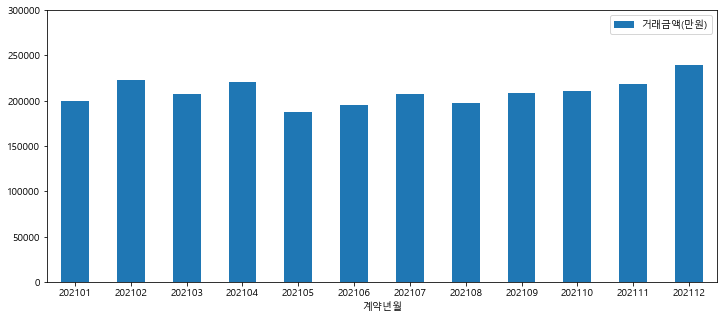

In [275]:
df_ggmr.plot.bar(x='계약년월', y='거래금액(만원)', rot=0, figsize=(12, 5))
plt.ylim(0, 300000)

plt.show()